In [ ]:
#Establish the Connection

In [13]:
import pyodbc


In [22]:
conn_str = (
    "DRIVER={SQL Server};"
    "SERVER=DESKTOP-L19JVLS\\SQLEXPRESS;"  
    "DATABASE=HostelData;"  
    "Trusted_Connection=yes;"
)

# Establish connection
connection = pyodbc.connect(conn_str)

# Test connection
print("Connected to SQL Server!")

Connected to SQL Server!


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install sqlalchemy

In [9]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [32]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# SQLAlchemy connection string
engine = create_engine(
    "mssql+pyodbc://DESKTOP-L19JVLS\\SQLEXPRESS/HostelData?driver=ODBC+Driver+17+for+SQL+Server"
)


In [ ]:
#Question 1:relationships among all the tables in a dataset

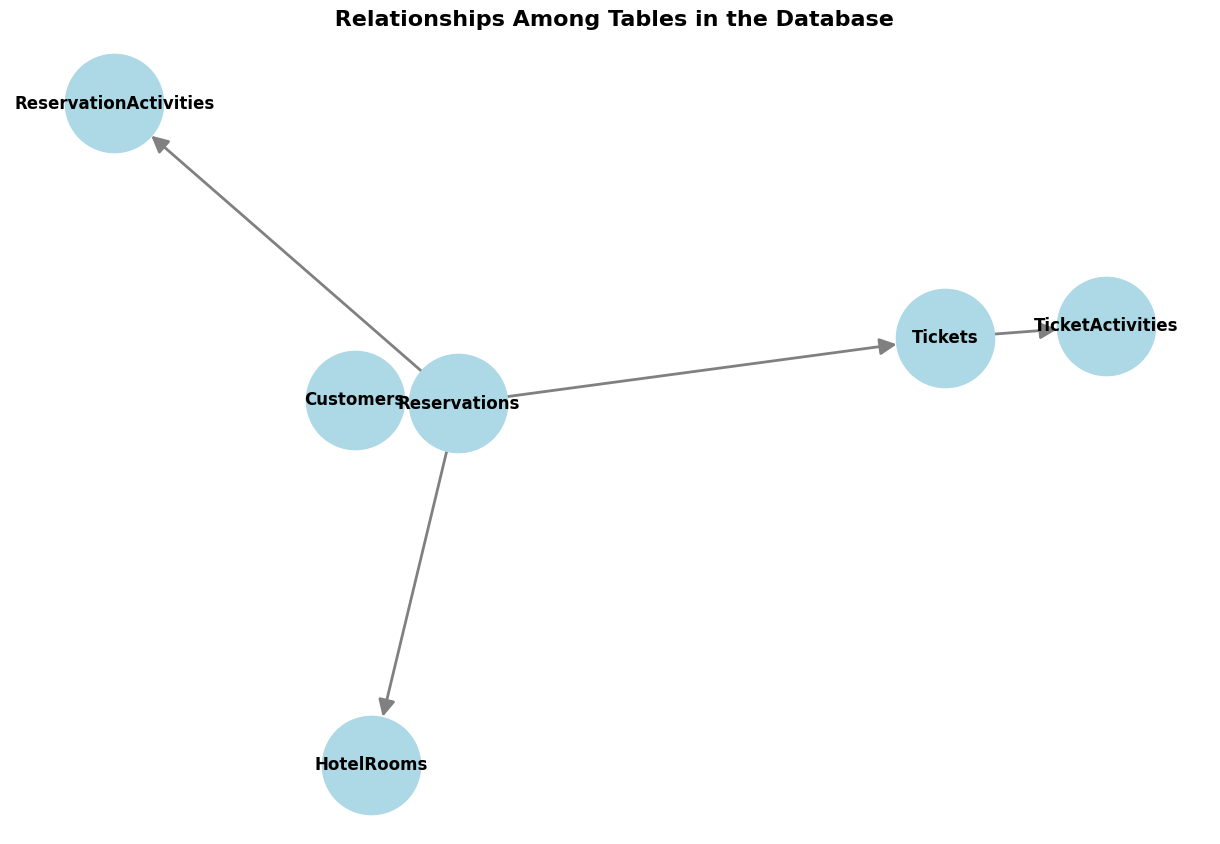

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Define relationships based on the database 
relationships = [
    ("Customers", "Reservations"),
    ("Reservations", "HotelRooms"),
    ("Reservations", "Tickets"),
    ("Tickets", "TicketActivities"),
    ("Reservations", "ReservationActivities"),
]


graph = nx.DiGraph()

graph.add_edges_from(relationships)

pos = nx.spring_layout(graph, seed=42) 

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=5000,
    node_color="lightblue",
    font_size=12,
    font_weight="bold",
    edge_color="gray",
    arrowsize=25,
    width=2,
)
plt.title(" Relationships Among Tables in the Database", fontsize=16, fontweight="bold")
plt.show()


In [ ]:
#Question 2:total number of unique customers

In [37]:
# Query to fetch total and unique customers
query = """
SELECT 
    (SELECT COUNT(*) FROM Customers) AS TotalCustomers,
    (SELECT COUNT(DISTINCT [Customer Number]) FROM Customers) AS UniqueCustomers;
"""

# Execute the query and fetch the data
data = pd.read_sql(query, engine)

# Display the result
print(data)





   TotalCustomers  UniqueCustomers
0            2349             2349


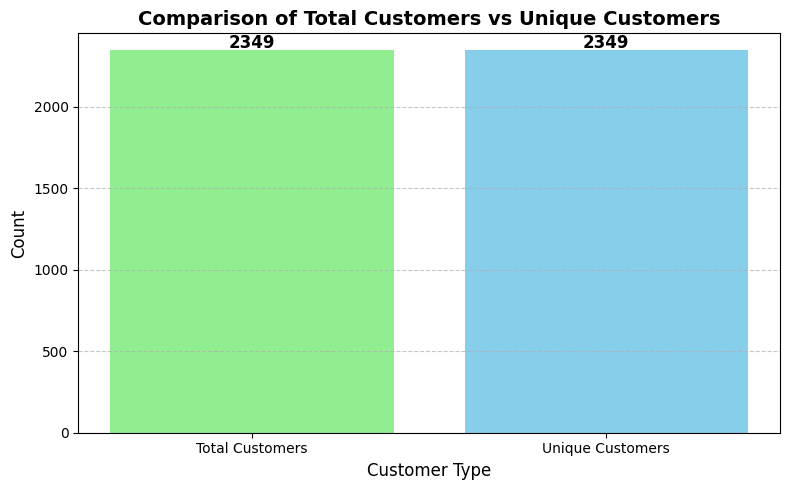

In [38]:
import matplotlib.pyplot as plt
# Extract values from the query result
total_customers = data['TotalCustomers'][0]
unique_customers = data['UniqueCustomers'][0]

# Data for the bar chart
categories = ["Total Customers", "Unique Customers"]
values = [total_customers, unique_customers]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=["lightgreen", "skyblue"])
plt.title("Comparison of Total Customers vs Unique Customers", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=12)
plt.xlabel("Customer Type", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, total_customers + 100)  # Slightly above total customers for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate the bars
for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha="center", fontsize=12, fontweight="bold")

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
#Question 3:.calculate the occupancy rate

In [35]:
# Query to calculate occupied nights and total available nights
query = """
SELECT 
    SUM(Nights) AS OccupiedNights, 
    COUNT(DISTINCT [Room Number]) * DATEDIFF(DAY, MIN([Check-In Date]), MAX([Check-Out Date])) AS TotalAvailableNights
FROM Reservations;
"""

# Fetch data using pandas with SQLAlchemy
occupancy_data = pd.read_sql(query, engine)

# Display the fetched data
print(occupancy_data)
# Extract values from the query result
occupied_nights = occupancy_data['OccupiedNights'][0]
total_available_nights = occupancy_data['TotalAvailableNights'][0]

# Calculate the occupancy rate
occupancy_rate = (occupied_nights / total_available_nights) * 100
print(f"Occupied Nights: {occupied_nights}")
print(f"Total Available Nights: {total_available_nights}")
print(f"Occupancy Rate: {occupancy_rate:.2f}%")



   OccupiedNights  TotalAvailableNights
0          8584.0                 10440
Occupied Nights: 8584.0
Total Available Nights: 10440
Occupancy Rate: 82.22%


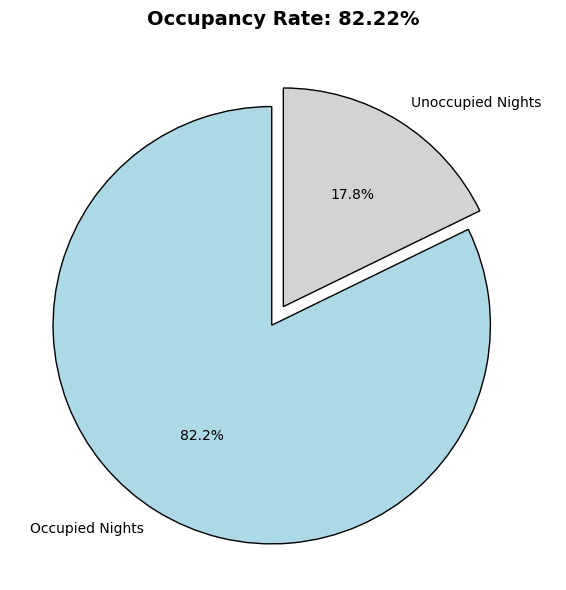

In [36]:
# Data for visualization
unoccupied_nights = total_available_nights - occupied_nights
labels = ["Occupied Nights", "Unoccupied Nights"]
values = [occupied_nights, unoccupied_nights]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightblue", "lightgray"],
    explode=(0.1, 0),  # Highlight "Occupied Nights"
    wedgeprops={"edgecolor": "black"}
)
plt.title(f"Occupancy Rate: {occupancy_rate:.2f}%", fontsize=14, fontweight="bold")
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
#Question 4: Distribution of Customer Complaints Room-Wise

In [33]:
# SQL Query to fetch complaints distribution room-wise
query = """
SELECT 
    r.[Room Number], 
    COUNT(t.[Ticket ID]) AS ComplaintCount
FROM Tickets t
INNER JOIN Reservations r ON t.[Reservation ID] = r.[Reservation ID]
GROUP BY r.[Room Number]
ORDER BY ComplaintCount DESC;
"""

# Fetch the data using pandas
complaints_data = pd.read_sql(query, engine)

# Display the fetched data
print(complaints_data)



    Room Number  ComplaintCount
0         104.0              50
1         102.0              46
2         305.0              44
3         303.0              42
4         306.0              41
5         206.0              41
6         101.0              39
7         106.0              38
8         202.0              38
9         301.0              37
10        304.0              37
11        201.0              36
12        105.0              36
13        205.0              35
14        302.0              33
15        103.0              32
16        203.0              29
17        204.0              27


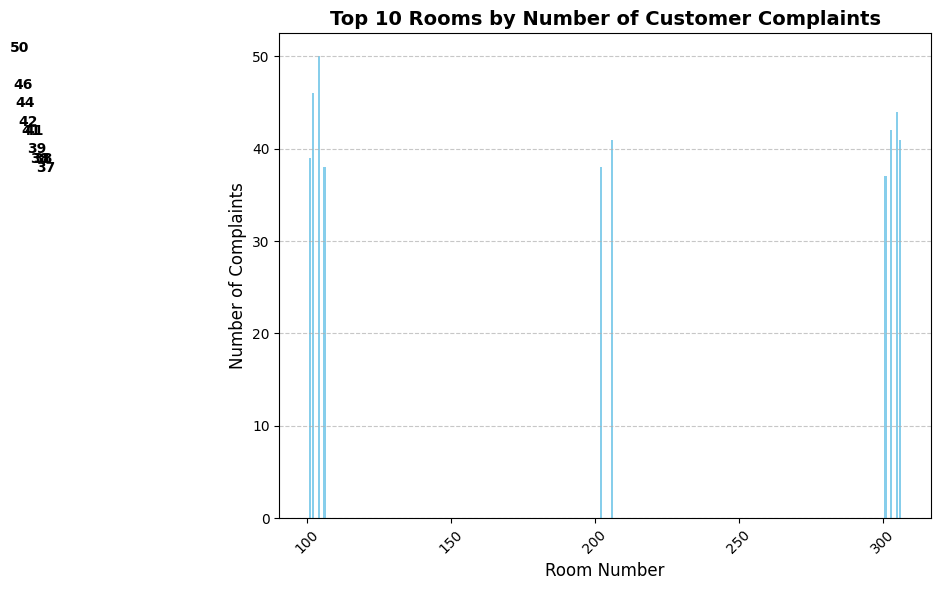

In [34]:
# Limit data to the top 10 rooms with the most complaints
top_complaints = complaints_data.nlargest(10, "ComplaintCount")

# Visualization of complaints distribution room-wise
plt.figure(figsize=(10, 6))
plt.bar(top_complaints["Room Number"], top_complaints["ComplaintCount"], color="skyblue")
plt.title("Top 10 Rooms by Number of Customer Complaints", fontsize=14, fontweight="bold")
plt.xlabel("Room Number", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars
for i, v in enumerate(top_complaints["ComplaintCount"]):
    plt.text(i, v + 0.5, str(v), ha="center", fontsize=10, fontweight="bold")

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
#Question 5: key complaints identified in customer feedback

In [40]:
# SQL Query
query = """
SELECT 
    [Description] AS ComplaintDescription,
    COUNT([Ticket ID]) AS ComplaintCount
FROM Tickets
GROUP BY [Description]
ORDER BY ComplaintCount DESC;
"""

# Execute the query and fetch the data
complaints_data = pd.read_sql(query, engine)

# Display the results
print(complaints_data)

                            ComplaintDescription  ComplaintCount
0                         Dirty towels provided.             102
1                             Hair found in bed.              86
2                         Dust on the furniture.              84
3                 Bathroom not properly cleaned.              74
4                Television cannot be turned on.              54
5                  Air conditioning not working.              53
6                          Broken light in room.              51
7   Suspicious activities reported on the floor.              41
8                            No Wi-Fi available.              39
9             Room door does not close properly.              35
10                Safe in the room is defective.              32
11              Personal belongings were stolen.              30


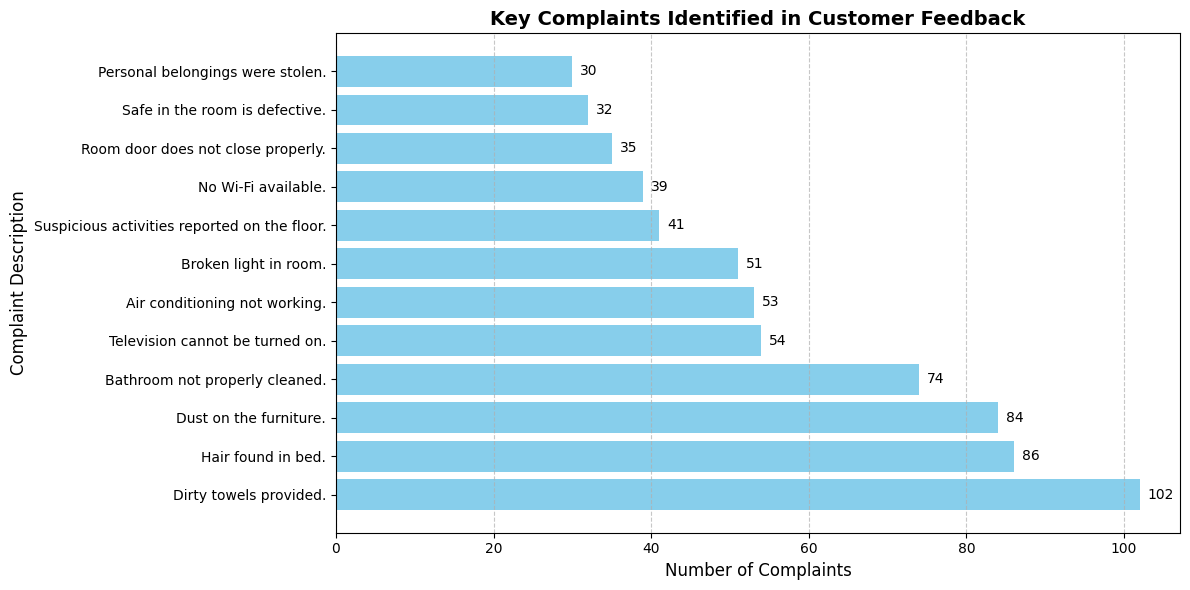

In [41]:
import matplotlib.pyplot as plt

# Extract data for visualization
complaint_descriptions = complaints_data["ComplaintDescription"]
complaint_counts = complaints_data["ComplaintCount"]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(complaint_descriptions, complaint_counts, color="skyblue")
plt.title("Key Complaints Identified in Customer Feedback", fontsize=14, fontweight="bold")
plt.xlabel("Number of Complaints", fontsize=12)
plt.ylabel("Complaint Description", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Annotate the bars
for i, v in enumerate(complaint_counts):
    plt.text(v + 1, i, str(v), va="center", fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
#Question 6:  customer retention rate 

In [43]:
# SQL Query to calculate customer retention rate
query = """
WITH CustomerReservations AS (
    SELECT 
        [Customer Number], 
        COUNT([Reservation ID]) AS ReservationCount
    FROM Reservations
    GROUP BY [Customer Number]
)
SELECT
    (SELECT COUNT(*) FROM CustomerReservations) AS TotalCustomers,
    (SELECT COUNT(*) FROM CustomerReservations WHERE ReservationCount > 1) AS ReturningCustomers;
"""

# Execute the query and fetch the data
retention_data = pd.read_sql(query, engine)

# Display the results
print(retention_data)
# Extract values
total_customers = retention_data["TotalCustomers"][0]
returning_customers = retention_data["ReturningCustomers"][0]

# Calculate retention rate
retention_rate = (returning_customers / total_customers) * 100

# Display the results
print(f"Total Customers: {total_customers}")
print(f"Returning Customers: {returning_customers}")
print(f"Customer Retention Rate: {retention_rate:.2f}%")


   TotalCustomers  ReturningCustomers
0            2349                 315
Total Customers: 2349
Returning Customers: 315
Customer Retention Rate: 13.41%


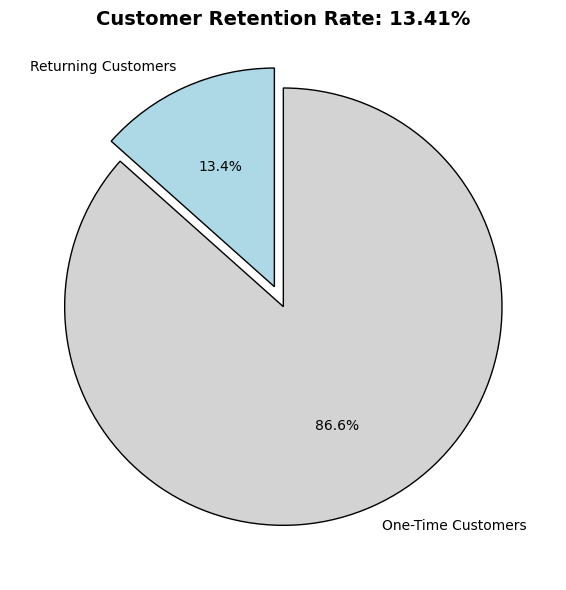

In [44]:
import matplotlib.pyplot as plt

# Data for visualization
labels = ["Returning Customers", "One-Time Customers"]
values = [returning_customers, total_customers - returning_customers]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=["lightblue", "lightgray"],
    explode=(0.1, 0),  # Slightly separate "Returning Customers"
    wedgeprops={"edgecolor": "black"}
)
plt.title(f"Customer Retention Rate: {retention_rate:.2f}%", fontsize=14, fontweight="bold")
plt.tight_layout()

# Show the chart
plt.show()


In [ ]:
#Question 7: total number of complaints be identified for each room

In [58]:
query = """
SELECT 
    r.[Room Number], 
    COUNT(t.[Ticket ID]) AS ComplaintCount
FROM Tickets t
INNER JOIN Reservations r ON t.[Reservation ID] = r.[Reservation ID]
GROUP BY r.[Room Number]
ORDER BY ComplaintCount DESC;
"""

# Execute the query and fetch the data
complaints_data = pd.read_sql(query, engine)

# Display the results
print(complaints_data)

    Room Number  ComplaintCount
0         104.0              50
1         102.0              46
2         305.0              44
3         303.0              42
4         306.0              41
5         206.0              41
6         101.0              39
7         106.0              38
8         202.0              38
9         301.0              37
10        304.0              37
11        201.0              36
12        105.0              36
13        205.0              35
14        302.0              33
15        103.0              32
16        203.0              29
17        204.0              27


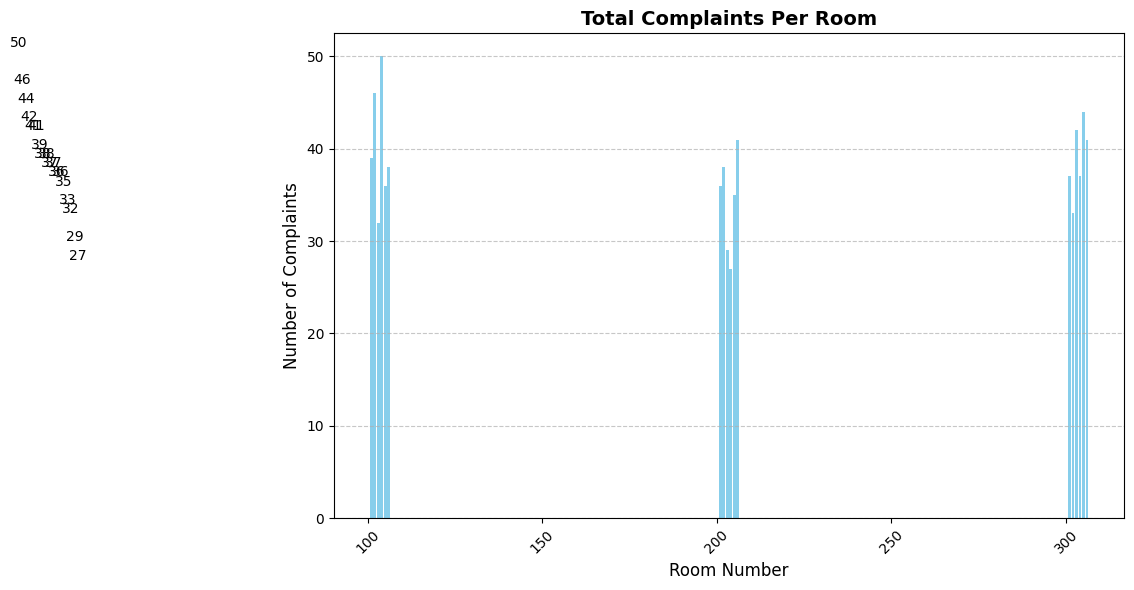

In [46]:
import matplotlib.pyplot as plt

# Extract data for visualization
room_numbers = complaints_data["Room Number"]
complaint_counts = complaints_data["ComplaintCount"]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(room_numbers, complaint_counts, color="skyblue")
plt.title("Total Complaints Per Room", fontsize=14, fontweight="bold")
plt.xlabel("Room Number", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars
for i, v in enumerate(complaint_counts):
    plt.text(i, v + 1, str(v), ha="center", fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
 #Question 8: Region-wise Breakdown of Offers Sent and Customer Engagement

In [48]:
# Query to get region-wise breakdown of offers and engagement
query = """
SELECT 
    c.[Residence] AS Region, 
    COUNT(c.[Customer Number]) AS TotalCustomers,
    SUM(CASE WHEN c.[Key Customer] = 1 THEN 1 ELSE 0 END) AS EngagedCustomers
FROM Customers c
GROUP BY c.[Residence]
ORDER BY TotalCustomers DESC;
"""

# Fetch data
region_data = pd.read_sql(query, engine)

# Display results
print(region_data)

              Region  TotalCustomers  EngagedCustomers
0             Munich             452                27
1            Hamburg             428                40
2          Stuttgart             428                33
3             Berlin             396                21
4          Frankfurt             392                18
5          Rotterdam              21                 0
6           Brussels              18                 0
7         Maastricht              15                 1
8            Utrecht              14                 0
9            Antwerp              12                 2
10         Eindhoven              10                 0
11         Amsterdam              10                 0
12             Ghent              10                 0
13             Paris               9                 1
14            Bruges               8                 0
15             Liege               8                 1
16          New York               7                 0
17  Esch-s

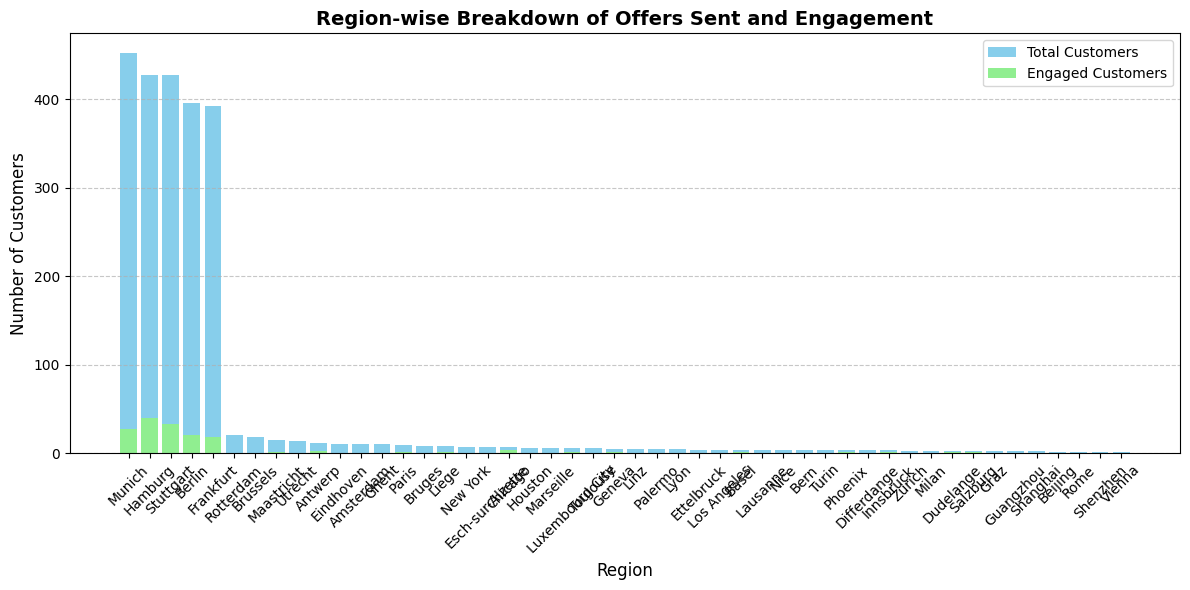

In [49]:
import matplotlib.pyplot as plt

# Extract data
regions = region_data["Region"]
total_customers = region_data["TotalCustomers"]
engaged_customers = region_data["EngagedCustomers"]

# Create stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(regions, total_customers, label="Total Customers", color="skyblue")
plt.bar(regions, engaged_customers, label="Engaged Customers", color="lightgreen")

# Add titles and labels
plt.title("Region-wise Breakdown of Offers Sent and Engagement", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show chart
plt.tight_layout()
plt.show()


In [ ]:
#Question 9: Revenue Per Room

In [53]:
query = """
SELECT 
    r.[Room Number], 
    SUM(r.[Price]) AS TotalRevenue
FROM Reservations r
GROUP BY r.[Room Number]
ORDER BY TotalRevenue DESC;
"""

# Fetch data
revenue_data = pd.read_sql(query, engine)

# Display results
print(revenue_data)

    Room Number  TotalRevenue
0         204.0       48250.0
1         105.0       48000.0
2         101.0       47500.0
3         305.0       47500.0
4         202.0       47250.0
5         303.0       46750.0
6         102.0       46500.0
7         206.0       21340.0
8         302.0       21120.0
9         304.0       20790.0
10        203.0       20680.0
11        104.0       20460.0
12        306.0       20240.0
13        103.0       15360.0
14        201.0       15360.0
15        205.0       15200.0
16        301.0       15040.0
17        106.0       14720.0


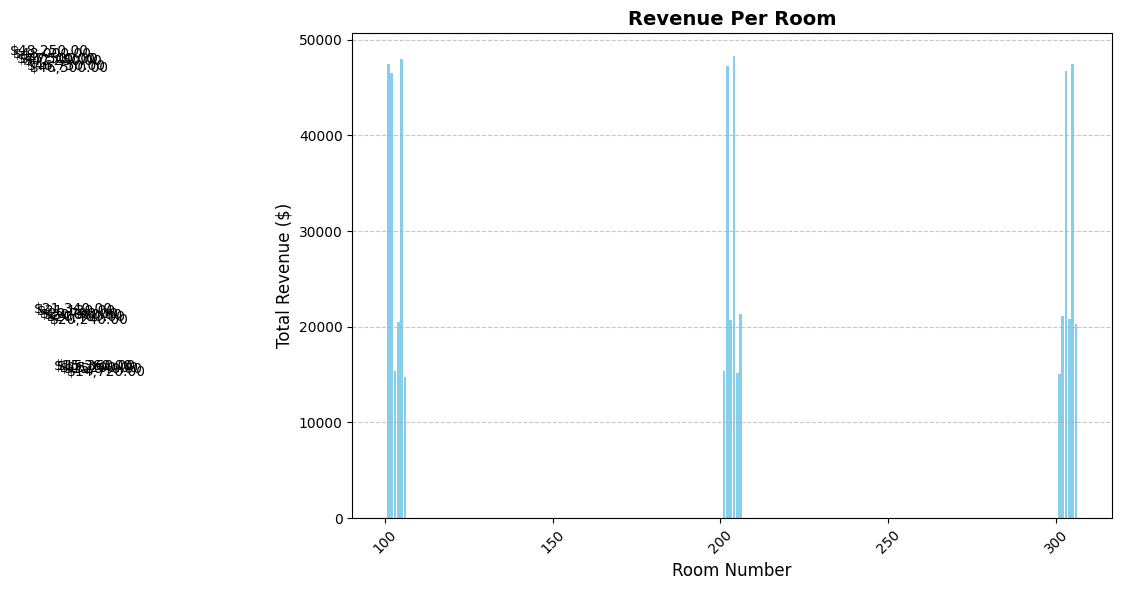

In [54]:
# Extract data
room_numbers = revenue_data["Room Number"]
total_revenue = revenue_data["TotalRevenue"]

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(room_numbers, total_revenue, color="skyblue")
plt.title("Revenue Per Room", fontsize=14, fontweight="bold")
plt.xlabel("Room Number", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars
for i, v in enumerate(total_revenue):
    plt.text(i, v + 100, f"${v:,.2f}", ha="center", fontsize=10)

# Show chart
plt.tight_layout()
plt.show()
